In [135]:
import numpy as np
import pandas as pd

import graphviz
import matplotlib.pyplot as plt

data = pd.read_csv('austin_weather.csv', parse_dates=['Date'])
print(data.shape)
# df = data
data.head()

(1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [0]:
events = data[['Events']]

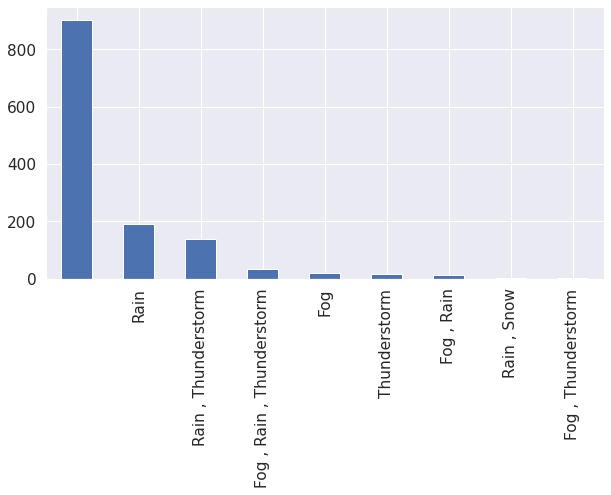

In [142]:
 
events.Events.value_counts().plot(kind='bar', figsize=(10,5))
  

In [0]:
condition = data['Events'].str.contains(' ')
to_be_kept = ['Date','TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'Events']

# excluding clear weather
polished_data = data[condition == False]

# i keep only a few choosen columns
polished_data = polished_data.loc[:, polished_data.columns.intersection(to_be_kept)]
X = polished_data[set(list(polished_data.columns))-set(['Events', 'Date'])]
y = polished_data['Events']


In [0]:
from sklearn import tree
from sklearn.metrics import accuracy_score

# this function generates n = len(max_depths) decision trees. Each of depth max_depths[i]
# fits on x_train, y_train, predicts on x_test
# returns classifiers and predictions
def many_decision_trees(max_depths, criterion, x_train, y_train, x_test, y_test):
    clf_array = []
    predictions_array = []
    
    for depth in max_depths:
        clf = tree.DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        clf = clf.fit(x_train, y_train) 
        prediction = clf.predict(x_test)
        
        print('Tree depth: {} Accuracy: {}'.format(depth, accuracy_score(y_test, prediction)))
        
        clf_array.append(clf)
        predictions_array.append(prediction)
    return clf_array, predictions_array

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

depths = list(range(3, 8))

# lets try the decision tree
# first predicting on training data
print('Prediction on training data -------------------------')
clfs_tr, predictions_tr = many_decision_trees(depths, 'entropy', X_train, y_train, X_train, y_train)  

# then predicting on test data
print('\nPrediction on test data -----------------------------')
clfs_te, predictions_te = many_decision_trees(depths, 'entropy', X_train, y_train, X_test, y_test)  

Prediction on training data -------------------------
Tree depth: 3 Accuracy: 0.8961038961038961
Tree depth: 4 Accuracy: 0.9025974025974026
Tree depth: 5 Accuracy: 0.9090909090909091
Tree depth: 6 Accuracy: 0.935064935064935
Tree depth: 7 Accuracy: 0.961038961038961

Prediction on test data -----------------------------
Tree depth: 3 Accuracy: 0.8157894736842105
Tree depth: 4 Accuracy: 0.8157894736842105
Tree depth: 5 Accuracy: 0.8157894736842105
Tree depth: 6 Accuracy: 0.7894736842105263
Tree depth: 7 Accuracy: 0.7894736842105263


In [146]:
data = pd.read_csv('austin_weather.csv', parse_dates=['Date'])

to_be_kept = ['Date','TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'Events']
condition = data['Events'].str.contains(',')

# first i remove instances of events that are in the form 'Fog, Rain, Thunderstorm'
polished_data_2 = data[condition == False]

polished_data_2 = polished_data_2.loc[:, polished_data_2.columns.intersection(to_be_kept)]
polished_data_2.Events.replace([' '], ['Clear'], inplace=True)

# trying the code above with this data led to an error: ValueError: could not convert string to float: '-'
# this means we are missing some data in the dataset, for scikit-learn's to understand a value as missing it needs to be NaN
# so we replace '-' with NaN
polished_data_2 = polished_data_2.replace('-', float('NaN'))

X = polished_data_2[set(list(polished_data_2.columns))-set(['Events', 'Date'])]
# Date to days of year since integers are easier to deal with
days_of_year = [date.dayofyear for date in polished_data_2['Date']]
X['DayOfYear'] = days_of_year
y = polished_data_2['Events']
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SeaLevelPressureAvgInches,DewPointAvgF,HumidityAvgPercent,TempAvgF,DayOfYear
1,30.13,36,68,48,356
2,30.49,27,52,45,357
3,30.45,28,56,46,358
4,30.33,40,71,50,359
5,30.4,36,63,48,360


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=float('NaN'), strategy='mean')
imp = imp.fit(X_train)
X_train = imp.transform(X_train)
imp = imp.fit(X_test)
X_test = imp.transform(X_test)
    
depths = list(range(3, 8))
# lets try the decision tree
# first predicting on training data
print('Prediction on training data -------------------------')
clfs_tr, predictions_tr = many_decision_trees(depths, 'entropy', X_train, y_train, X_train, y_train)  

# then predicting on test data
print('\nPrediction on test data -----------------------------')
clfs_te, predictions_te = many_decision_trees(depths, 'entropy', X_train, y_train, X_test, y_test)  

Prediction on training data -------------------------
Tree depth: 3 Accuracy: 0.8462897526501767
Tree depth: 4 Accuracy: 0.8586572438162544
Tree depth: 5 Accuracy: 0.8745583038869258
Tree depth: 6 Accuracy: 0.8851590106007067
Tree depth: 7 Accuracy: 0.9081272084805654

Prediction on test data -----------------------------
Tree depth: 3 Accuracy: 0.8306878306878307
Tree depth: 4 Accuracy: 0.8218694885361552
Tree depth: 5 Accuracy: 0.8236331569664903
Tree depth: 6 Accuracy: 0.8148148148148148
Tree depth: 7 Accuracy: 0.7865961199294532


Classes: ['Clear' 'Fog' 'Rain' 'Thunderstorm']
Features: ['SeaLevelPressureAvgInches', 'DewPointAvgF', 'HumidityAvgPercent', 'TempAvgF', 'DayOfYear']


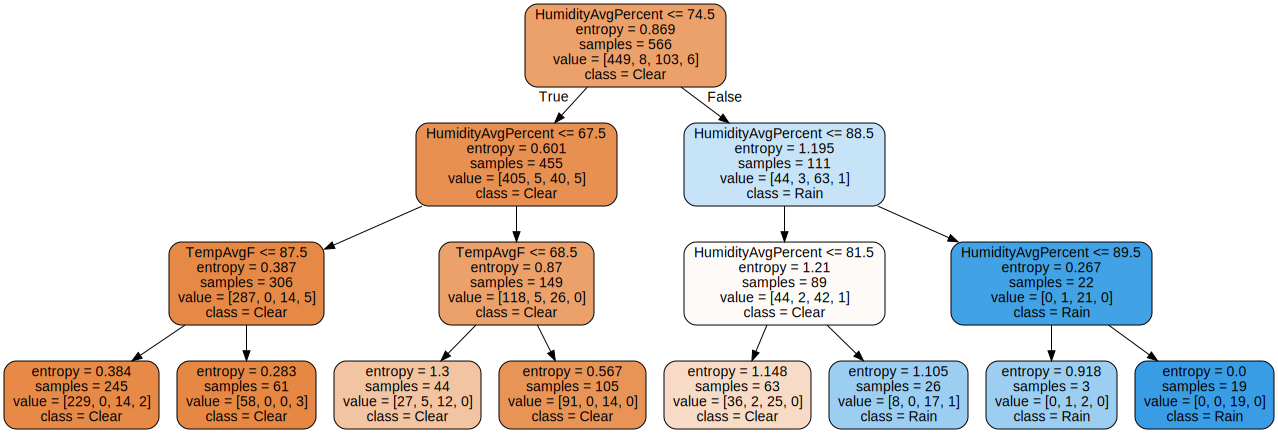

In [151]:
# again printing the tree
print('Classes: {}'.format(clfs_te[0].classes_))
print('Features: {}'.format(list(X)))

dot_data = tree.export_graphviz(clfs_te[0], out_file=None, rounded=True, class_names=clfs_te[0].classes_, 
                                feature_names=list(X), filled=True)
graph = graphviz.Source(dot_data) 
graph

In [152]:
 classes_occurrences = polished_data_2['Events'].value_counts().to_frame()
classes_occurrences = classes_occurrences.sort_index(axis=0)
print(classes_occurrences)

              Events
Clear            903
Fog               21
Rain             192
Thunderstorm      17


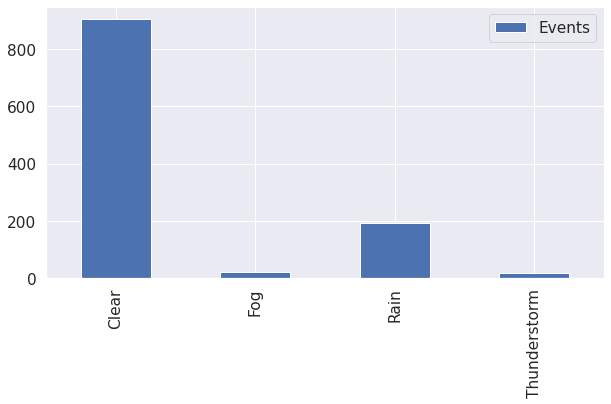

In [156]:
classes_occurrences.plot(kind='bar', figsize=(10,5))

Confusion matrix

 [[355  11  74   9]
 [  6   0   1   1]
 [ 87   2  13   1]
 [  5   0   1   0]] 




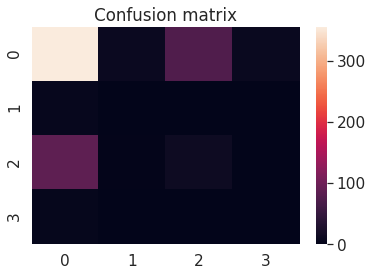

Accuracy of algorithm : 65.01766784452296 %


In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
import pylab as pl
import seaborn as sn
labels = y_test.unique()
test= y_test.head(566)
train= y_train.head(566)
cf= confusion_matrix(train,test)  
print('Confusion matrix\n\n',cf,'\n\n')
# accuracy= accuracy_score(y_test.head(566), y_train.head(566))  
# print('Accuracy :',accuracy*100 ,'%')

# printing confusion matrix with coloured columns 
df_cm= cf
sn.set(font_scale=1.4) # for label size
sn.heatmap( df_cm, annot_kws={"size": 20}) # font size
 
plt.title('Confusion matrix')
plt.show()

accuracy= accuracy_score(train,test)  
print('Accuracy of algorithm :',accuracy*100 ,'%')
 